In [1]:
import sklearn as sk
import pandas as pd
import numpy as np
from os import getenv
from datetime import datetime
from amb_sdk.sdk import DarwinSdk
import matplotlib.pyplot as plt

%matplotlib inline

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
cycle_df = pd.read_csv('./data/Cleaned_Cycle_Trips_Weather_Dates.csv')
weather_df = pd.read_csv('./data/austin_weather.csv')

In [3]:
cycle_df.dtypes

Unnamed: 0                 int64
Trip ID                    int64
Membership Type           object
Bicycle ID               float64
Checkout Date             object
Checkout Time             object
Checkout Kiosk            object
Return Kiosk              object
Trip Duration Minutes      int64
Month                      int64
Year                       int64
dtype: object

In [7]:
cycle_df['Checkout Date'] = pd.to_datetime(
    cycle_df['Checkout Date'], infer_datetime_format=True
    ).dt.normalize() #strftime('%m/%d/%Y') # format='%m/%d/%Y').dt.date

cycle_df['Checkout Time'] = pd.to_timedelta(
    cycle_df['Checkout Time']) #, format='%H:%M:%S')\
#.dt.strftime('%H:%M') #This turns it back to a object dtype


weather_df['Date'] = pd.to_datetime(
    weather_df['Date'], infer_datetime_format=True
    ).dt.normalize() #strftime('%m/%d/%Y') # format='%m/%d/%Y').dt.date

In [8]:
cycle_df.dtypes

Unnamed: 0                         int64
Trip ID                            int64
Membership Type                   object
Bicycle ID                       float64
Checkout Date             datetime64[ns]
Checkout Time            timedelta64[ns]
Checkout Kiosk                    object
Return Kiosk                      object
Trip Duration Minutes              int64
Month                              int64
Year                               int64
dtype: object

In [9]:
print('Cycle Trips Earliest Data',cycle_df['Checkout Date'].dt.date.min())
print('Cycle Trips Latest Data',cycle_df['Checkout Date'].dt.date.max())

print('Weather Earliest Data',weather_df['Date'].dt.date.min())
print('Weather Latest Data',weather_df['Date'].dt.date.max())

Cycle Trips Earliest Data 2013-12-21
Cycle Trips Latest Data 2017-07-31
Weather Earliest Data 2013-12-21
Weather Latest Data 2017-07-31


In [17]:
cycle_df['Checkout WeekDay'] = cycle_df['Checkout Date'].dt.day_name()
cycle_df.drop('Unnamed: 0', axis=1, inplace=True)
weather_df['Weekday'] = weather_df['Date'].dt.day_name()


Index(['Trip ID', 'Membership Type', 'Bicycle ID', 'Checkout Date',
       'Checkout Time', 'Checkout Kiosk', 'Return Kiosk',
       'Trip Duration Minutes', 'Month', 'Year', 'Checkout WeekDay'],
      dtype='object')

In [18]:
cycle_df.head()

,Trip ID,Membership Type,Bicycle ID,Checkout Date,Checkout Time,Checkout Kiosk,Return Kiosk,Trip Duration Minutes,Month,Year,Checkout WeekDay
0,9900285854,Annual (San Antonio B-cycle),207.0,2014-10-26,13:12:00,West & 6th St.,Rainey St @ Cummings,76,10,2014,Sunday
1,9900285855,24-Hour Kiosk (Austin B-cycle),969.0,2014-10-26,13:12:00,Convention Center / 4th St. @ MetroRail,Pfluger Bridge @ W 2nd Street,58,10,2014,Sunday
2,9900285856,Annual Membership (Austin B-cycle),214.0,2014-10-26,13:12:00,West & 6th St.,8th & Congress,8,10,2014,Sunday
3,9900285857,24-Hour Kiosk (Austin B-cycle),745.0,2014-10-26,13:12:00,Zilker Park at Barton Springs & William Barton...,Zilker Park at Barton Springs & William Barton...,28,10,2014,Sunday
4,9900285858,24-Hour Kiosk (Austin B-cycle),164.0,2014-10-26,13:12:00,Bullock Museum @ Congress & MLK,Convention Center/ 3rd & Trinity,15,10,2014,Sunday


In [128]:
weather_df.head(10)
#weather_df.PrecipitationSumInches.value_counts()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events,Weekday
0,2013-12-21,74,60,45,67,49,43,93,75,57,29.86,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm",Saturday
1,2013-12-22,56,48,39,43,36,28,93,68,43,30.41,30.13,29.87,10,10,5,16,6,25,0,,Sunday
2,2013-12-23,58,45,32,31,27,23,76,52,27,30.56,30.49,30.41,10,10,10,8,3,12,0,,Monday
3,2013-12-24,61,46,31,36,28,21,89,56,22,30.56,30.45,30.3,10,10,7,12,4,20,0,,Tuesday
4,2013-12-25,58,50,41,44,40,36,86,71,56,30.41,30.33,30.27,10,10,7,10,2,16,T,,Wednesday
5,2013-12-26,57,48,39,39,36,33,79,63,47,30.47,30.4,30.34,10,9,7,12,3,17,0,,Thursday
6,2013-12-27,60,53,45,41,39,37,83,65,47,30.46,30.39,30.34,10,9,7,7,1,11,T,,Friday
7,2013-12-28,62,51,40,43,39,33,92,64,36,30.33,30.17,30.04,10,10,7,10,2,14,T,,Saturday
8,2013-12-29,64,50,36,49,41,28,92,76,60,30.31,30.1,29.99,10,10,4,17,5,24,0,,Sunday
9,2013-12-30,44,40,35,31,26,21,75,60,45,30.44,30.33,30.26,10,10,10,13,5,21,0,,Monday


In [35]:
print('weather dates:', len(weather_df['Date'].unique()))
print('cycle dates:  ', len(cycle_df['Checkout Date'].unique()))

missing_dates = pd.date_range(start = '2013-12-21', end = '2017-07-31' )\
    .difference(cycle_df['Checkout Date'])

print(len(missing_dates))
missing_dates

weather dates: 1319
cycle dates:   1257
62


DatetimeIndex(['2014-08-31', '2016-04-01', '2016-04-02', '2016-04-03',
               '2016-04-04', '2016-04-05', '2016-04-06', '2016-04-07',
               '2016-04-08', '2016-04-09', '2016-04-10', '2016-04-11',
               '2016-04-12', '2016-04-13', '2016-04-14', '2016-04-15',
               '2016-04-16', '2016-04-17', '2016-04-18', '2016-04-19',
               '2016-04-20', '2016-04-21', '2016-04-22', '2016-04-23',
               '2016-04-24', '2016-04-25', '2016-04-26', '2016-04-27',
               '2016-04-28', '2016-04-29', '2016-04-30', '2016-12-01',
               '2016-12-02', '2016-12-03', '2016-12-04', '2016-12-05',
               '2016-12-06', '2016-12-07', '2016-12-08', '2016-12-09',
               '2016-12-10', '2016-12-11', '2016-12-12', '2016-12-13',
               '2016-12-14', '2016-12-15', '2016-12-16', '2016-12-17',
               '2016-12-18', '2016-12-19', '2016-12-20', '2016-12-21',
               '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25',
      

## Notes
It seems that the entire month of April and Decemeber for 2016 we have no data.   
The one other date is August 31, 2014. I wonder why.  

In [34]:
#Drops all the rows from the weather df where we have no data for cycle checkout

new_weather_df = weather_df[~weather_df['Date'].isin(missing_dates)]
len(new_weather_df['Date'].unique())


1257

In [224]:
rides_each_day = cycle_df.groupby('Checkout Date')

# total_rides = []
# for index,(date, group) in enumerate(rides_each_day):
#     print(date.date(), len(group))
#     print(group['Checkout Kiosk'].value_counts())
#     #total_rides.append(len(group))
#     if index == 1:
#         break
    
# print(len(cycle_df))
# print(np.sum(total_rides))

#weekday() returns monday as 0 and sunday as 6 

"""This code works it returns in descending order the Checkout and Return kiosks counts and names"""
# day_stats = pd.DataFrame(
# [
#     (date.date(),date.date().month, date.date().year, date.weekday(),
#      group['Checkout Kiosk'].value_counts().index[index],
#      group['Checkout Kiosk'].value_counts()[index],
#      group['Return Kiosk'].value_counts().index[index],
#      group['Return Kiosk'].value_counts()[index],
#      len(group))
#     for date,group in rides_each_day
#         for index,(_,_) in enumerate(zip(group['Checkout Kiosk'].value_counts(),
#                                          group['Return Kiosk'].value_counts()
#                                         )
#                                     )
# ], 
#     columns=['Date','Month','Year','Weekday', 
#             'Checkout Kiosk', "Checkout Counts",
#             'Return Kiosk', "Return Counts",
#             'Total Rides'])


day_stats = pd.DataFrame(
[
    (date.date(),date.date().month, date.date().year, date.weekday(),
     group['Checkout Kiosk'].value_counts().index[0],
     group['Checkout Kiosk'].value_counts()[0],
     group['Return Kiosk'].value_counts().index[0],
     group['Return Kiosk'].value_counts()[0],
     len(group))
    for date,group in rides_each_day
], 
    columns=['Date','Month','Year','Weekday', 
            'MP Checkout Kiosk', " MP Checkout Counts",
            'MP Return Kiosk', "MP Return Counts",
            'Total Rides'])

day_stats = day_stats[['Date','Month','Year','Weekday','Total Rides']]
day_stats['Date'] = pd.to_datetime(
    day_stats['Date'], infer_datetime_format=True
    ).dt.normalize()

day_stats.sort_values('Total Rides', ascending=False).head(10)

,Date,Month,Year,Weekday,Total Rides
452,2015-03-19,3,2015,3,3031
83,2014-03-14,3,2014,4,2808
447,2015-03-14,3,2015,5,2738
448,2015-03-15,3,2015,6,2652
84,2014-03-15,3,2014,5,2587
451,2015-03-18,3,2015,2,2471
449,2015-03-16,3,2015,0,2367
450,2015-03-17,3,2015,1,2217
816,2016-03-17,3,2016,3,2213
1121,2017-03-18,3,2017,5,2210


(1, 2014) 3375
(1, 2015) 7765
(1, 2016) 22161
(1, 2017) 10460
(2, 2014) 5506
(2, 2015) 9572
(2, 2016) 13355
(2, 2017) 13599
(3, 2014) 25792
(3, 2015) 30112
(3, 2016) 29566
(3, 2017) 26532
(4, 2014) 14461
(4, 2015) 16554
(4, 2017) 22404
(5, 2014) 15047
(5, 2015) 15842
(5, 2016) 19560
(5, 2017) 19123
(6, 2014) 13650
(6, 2015) 13894
(6, 2016) 16540
(6, 2017) 16108
(7, 2014) 14346
(7, 2015) 16332
(7, 2016) 16255
(7, 2017) 14644
(8, 2014) 11128
(8, 2015) 14523
(8, 2016) 12385
(9, 2014) 11563
(9, 2015) 15244
(9, 2016) 15939
(10, 2014) 22795
(10, 2015) 22864
(10, 2016) 24266
(11, 2014) 10767
(11, 2015) 11762
(11, 2016) 14653
(12, 2013) 1457
(12, 2014) 7273
(12, 2015) 10057


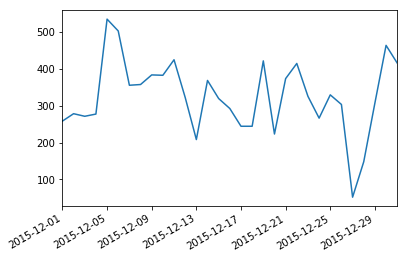

In [125]:
rides_each_month = cycle_df.groupby(['Month','Year'])

for name, group in rides_each_month:
    print(name, len(group))
    if name == (12,2015):
        group['Checkout Date'].value_counts().plot()
    

## Notes
something happened in Austin December 2015 - January 2016

In [319]:
filt_weather_df = weather_df[['Date','TempHighF','TempAvgF','DewPointHighF', 'DewPointAvgF',
                              'WindHighMPH','WindAvgMPH','PrecipitationSumInches','Events']]

#print(day_stats.dtypes)
# filt_weather_df.Events.value_counts()
#merge_df = pd.concat([day_stats, filt_weather_df], join='inner', axis=1)
merge_df = pd.merge(day_stats, filt_weather_df, on='Date')
print(merge_df.dtypes)
merge_df.head()

Date                      datetime64[ns]
Month                              int64
Year                               int64
Weekday                            int64
Total Rides                        int64
TempHighF                          int64
TempAvgF                           int64
DewPointHighF                     object
DewPointAvgF                      object
WindHighMPH                       object
WindAvgMPH                        object
PrecipitationSumInches            object
Events                            object
dtype: object


,Date,Month,Year,Weekday,Total Rides,TempHighF,TempAvgF,DewPointHighF,DewPointAvgF,WindHighMPH,WindAvgMPH,PrecipitationSumInches,Events
0,2013-12-21,12,2013,5,103,74,60,67,49,20,4,0.46,"Rain , Thunderstorm"
1,2013-12-22,12,2013,6,117,56,48,43,36,16,6,0,
2,2013-12-23,12,2013,0,96,58,45,31,27,8,3,0,
3,2013-12-24,12,2013,1,85,61,46,36,28,12,4,0,
4,2013-12-25,12,2013,2,145,58,50,44,40,10,2,T,


In [320]:
merge_df.Events.replace(' ', 'Sunny', inplace=True)

#merge_df[merge_df.Events == ' '] = 'Sunny'

#I am making the T (trace) equal to 0.01 inches.
merge_df['PrecipitationSumInches'].replace('T',0.005, inplace=True)
# else I can remove them
# merge_df = merge_df[~merge_df['PrecipitationSumInches'].isin(['T'])]

#merge_df.iloc[:,7:12].apply(pd.to_numeric)

"""
Need to figure out how to remove the - from the DewPointHighF column and replace it with the weighted 
mean value
"""

#merge_df.DewPointHighF.value_counts().index
# merge_df[~merge_df['DewPointHighF'].isin(['-'])].DewPointAvgF.astype('int').mean()
# This line above ^ returned a mean of 61.62
# merge_df[~merge_df['DewPointAvgF'].isin(['-'])].DewPointAvgF.astype('int').mean()
# This line above ^ returned a mean of 56.92
# merge_df[~merge_df['WindHighMPH'].isin(['-'])].WindHighMPH.astype('int').mean()
# This line above ^ returned a mean of 13.22
# merge_df[~merge_df['WindAvgMPH'].isin(['-'])].WindAvgMPH.astype('int').mean()
# This line above ^ returned a mean of 5.01



merge_df['DewPointHighF'].replace('-', 62, inplace=True)
merge_df['DewPointAvgF'].replace( '-', 57, inplace=True)
merge_df['WindHighMPH'].replace( '-', 13, inplace=True)
merge_df['WindAvgMPH'].replace('-', 5, inplace=True)

# merge_df.DewPointHighF.value_counts().index

# cols = merge_df.columns[merge_df.dtypes.eq('object')]
# merge_df[cols] = merge_df[cols].apply(pd.to_numeric,axis=1)

#merge_df.iloc[:,7:12] = merge_df.iloc[:,7:12].apply(pd.to_numeric)

cols = merge_df.columns[merge_df.dtypes.eq('object')][:-1]
merge_df[cols] = merge_df[cols].apply(pd.to_numeric)
merge_df.dtypes
#merge_df.head()

Date                      datetime64[ns]
Month                              int64
Year                               int64
Weekday                            int64
Total Rides                        int64
TempHighF                          int64
TempAvgF                           int64
DewPointHighF                      int64
DewPointAvgF                       int64
WindHighMPH                        int64
WindAvgMPH                         int64
PrecipitationSumInches           float64
Events                            object
dtype: object

In [346]:
precip_bins = [0,0.001, 0.5, 2,10]
merge_df['PrecipBins'] = pd.cut(merge_df.PrecipitationSumInches.astype('float64'), precip_bins,
                                labels=['0','0-0.5','0.5-2','2-10'],
                                include_lowest=True
                                )

merge_df.loc[merge_df['PrecipitationSumInches'] == 0.005, ['PrecipitationSumInches','Events']]

,PrecipitationSumInches,Events
4,0.005,Sunny
6,0.005,Sunny
7,0.005,Sunny
42,0.005,Rain
51,0.005,Rain
66,0.005,Rain
95,0.005,Rain
102,0.005,Rain
103,0.005,Sunny
104,0.005,Rain


In [322]:
merge_df.dtypes
# plt.matshow(merge_df.corr())
# plt.show()

Date                      datetime64[ns]
Month                              int64
Year                               int64
Weekday                            int64
Total Rides                        int64
TempHighF                          int64
TempAvgF                           int64
DewPointHighF                      int64
DewPointAvgF                       int64
WindHighMPH                        int64
WindAvgMPH                         int64
PrecipitationSumInches           float64
Events                            object
PrecipBins                      category
dtype: object

In [350]:
rides_by_rain = merge_df.groupby(['PrecipBins', 'Weekday'])

print(len(rides_by_rain.groups))
weather_rides = []
for index,(name,group) in enumerate(rides_by_rain):
    print(index%7, name[0],group['Total Rides'].sum())
    weather_rides.append((name[0],group['Total Rides'].sum()))
    
print(weather_rides[0::7])
# .plot(kind='bar',y='Total Rides')
# plt.show()

28
0 0 55131
1 0 52666
2 0 49582
3 0 51157
4 0 71144
5 0 94838
6 0 79933
0 0-0.5 18549
1 0-0.5 13313
2 0-0.5 18685
3 0-0.5 21942
4 0-0.5 26302
5 0-0.5 38474
6 0-0.5 28876
0 0.5-2 3231
1 0.5-2 2141
2 0.5-2 1374
3 0.5-2 1708
4 0.5-2 4581
5 0.5-2 7433
6 0.5-2 4935
0 2-10 796
1 2-10 323
2 2-10 366
3 2-10 897
4 2-10 160
5 2-10 101
6 2-10 593
[('0', 55131), ('0-0.5', 18549), ('0.5-2', 3231), ('2-10', 796)]


## Notes
Rain has a severe impact on how many bikes are checked out from B cycle.  
Even with a little bit of rain you see a sharp decrease in bike checkouts.  
However, once you go over an 1-2 inches of rain the trend associated with the day of the week goes away.  
Saturday actually becomes the least popular day if it rains over 1.5 inches. 


In [349]:
merge_df.to_csv('./data/cycle_weather_by_day.csv', index=False)

In [352]:
#cycle_df.head()
checkout_return_pairs = cycle_df.\
    groupby(['Checkout Kiosk','Return Kiosk']).size().reset_index()\
    .rename(columns={0:'counts'}) #.value_counts().head(15).plot(kind='bar')

checkout_return_pairs = checkout_return_pairs\
    .sort_values('counts', ascending=False).reset_index()

total_trips = checkout_return_pairs['counts'].sum()

checkout_return_pairs['freq_%'] = checkout_return_pairs['counts']\
    .map(lambda x: round(x/total_trips*100,4))

# checkout_return_pairs = checkout_return_pairs.\
#     set_index('freq_%').sort_index(ascending=False)

print(total_trips)
print(checkout_return_pairs.shape)

checkout_return_pairs.head(100)



# checkout_return_pairs['freq']

649231
(5110, 5)


,index,Checkout Kiosk,Return Kiosk,counts,freq_%
0,3959,Riverside @ S. Lamar,Riverside @ S. Lamar,8418,1.2966
1,3580,Rainey St @ Cummings,Rainey St @ Cummings,5691,0.8766
2,196,2nd & Congress,2nd & Congress,4336,0.6679
3,1575,City Hall / Lavaca & 2nd,City Hall / Lavaca & 2nd,4335,0.6677
4,1492,Capitol Station / Congress & 11th,Capitol Station / Congress & 11th,3644,0.5613
5,4999,Zilker Park,Zilker Park,3631,0.5593
6,3360,Pfluger Bridge @ W 2nd Street,Pfluger Bridge @ W 2nd Street,3483,0.5365
7,5109,Zilker Park at Barton Springs & William Barton...,Zilker Park at Barton Springs & William Barton...,3362,0.5178
8,996,Barton Springs & Riverside,Barton Springs & Riverside,3009,0.4635
9,3230,Palmer Auditorium,Palmer Auditorium,2941,0.4530


In [ ]:
kiosk_df = cycle_df